# Third Exercise
***

## In this Exercise we will find the best model and hyperparams with GridSearchCV

## Load and analize the data:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Customer_Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## Drop customerID
(to prevent wrong patterns)

In [5]:
df.drop(columns=['customerID'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Create new columns with text columns 

In [7]:
df_dumed = pd.get_dummies(df, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','Contract',
                                       'PaperlessBilling','PaymentMethod','TotalCharges','Churn'], dtype=int)

## We drop useless columns
(if it has values of zero and one it is not necessary to have two columns for zeros and for one)

In [8]:
df_dumed.drop(columns=['Churn_No','gender_Female','Partner_No', 'Dependents_No','PhoneService_No', 'PaperlessBilling_No'], inplace=True)

In [9]:
df_dumed.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Prepare Modeling

In [10]:
X = df_dumed.drop(columns=['Churn_Yes'])
y = df_dumed.Churn_Yes

In [11]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Apply Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2)

## Modeling
with the normal way

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

Accuracy Score: 0.71611071682044


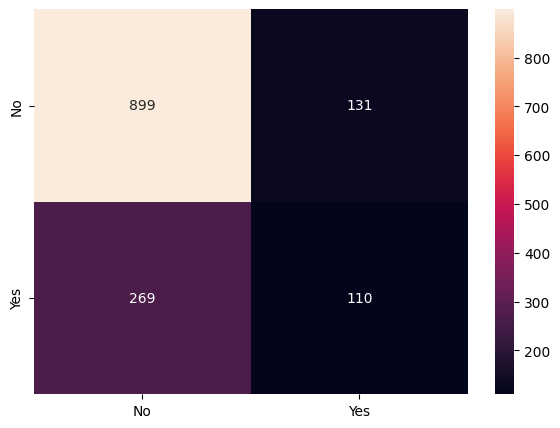

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot=True, fmt='.0f')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc}')

Accuracy Score: 0.6905606813342796, k = 1
Accuracy Score: 0.7182398864442867, k = 2
Accuracy Score: 0.7182398864442867, k = 3
Accuracy Score: 0.716820440028389, k = 4
Accuracy Score: 0.71611071682044, k = 5
Accuracy Score: 0.7402413058907026, k = 6
Accuracy Score: 0.7324343506032647, k = 7
Accuracy Score: 0.7331440738112136, k = 8
Accuracy Score: 0.7352732434350603, k = 9
Accuracy Score: 0.7409510290986515, k = 10


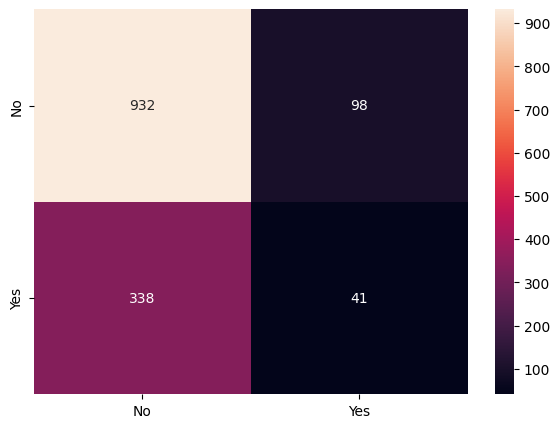

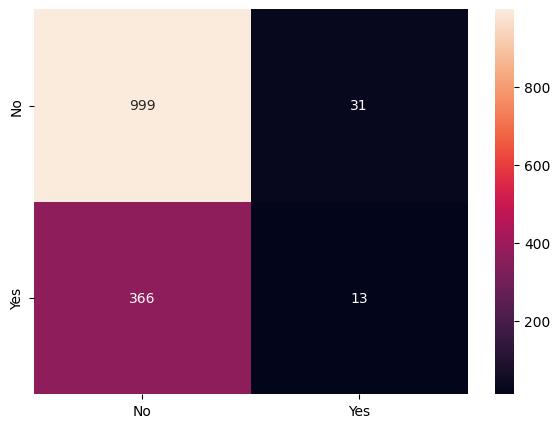

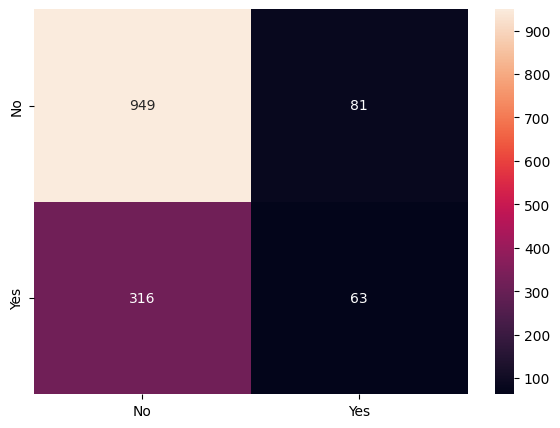

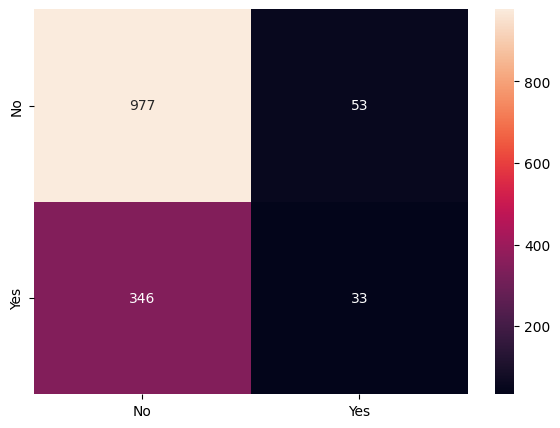

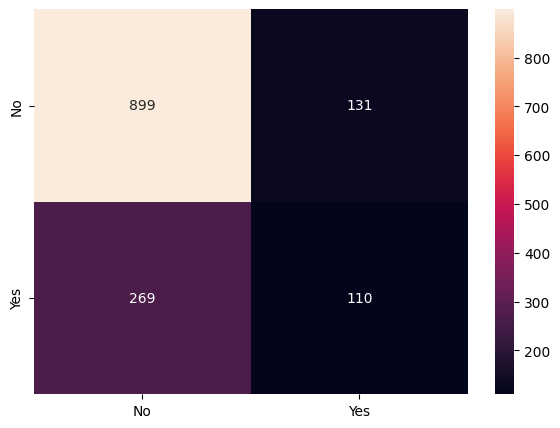

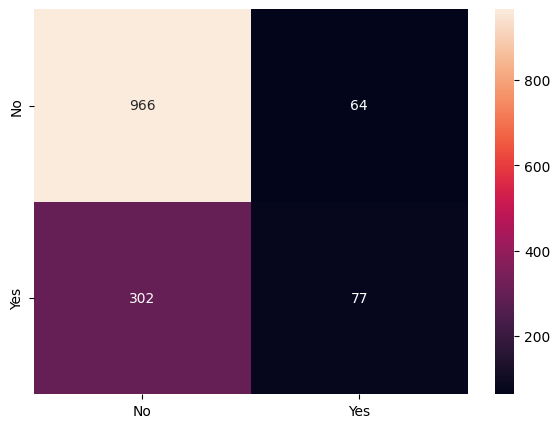

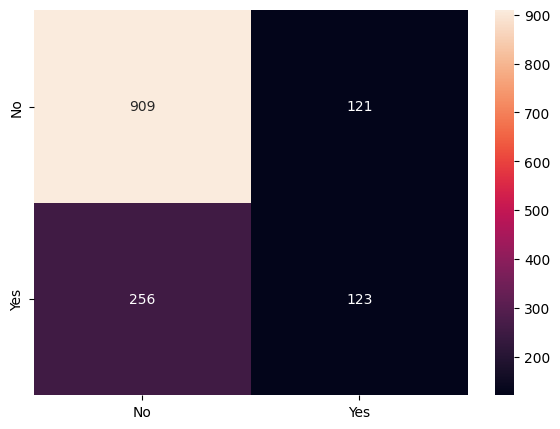

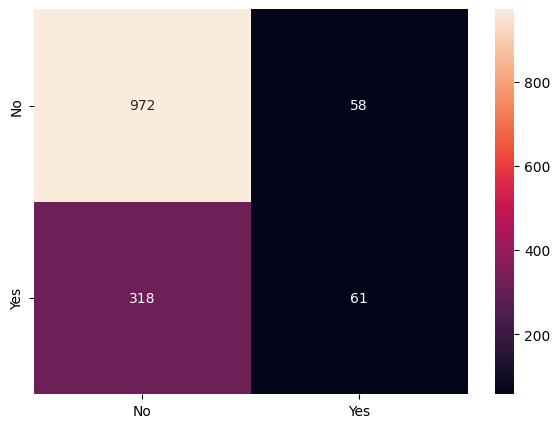

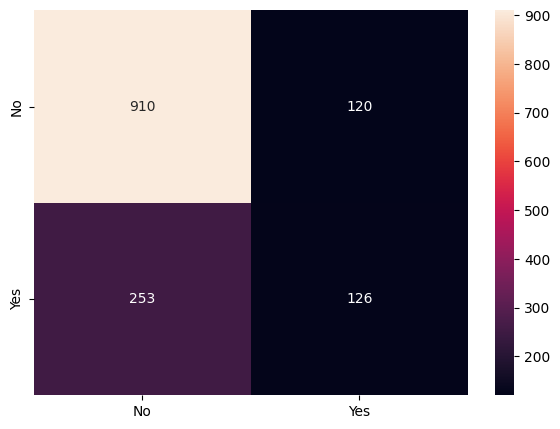

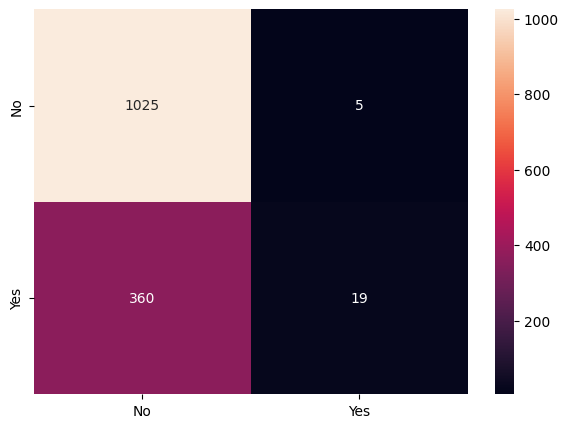

In [16]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score: {acc}, k = {k}')
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index = ['No', 'Yes'], columns=['No', 'Yes'])
    plt.figure(figsize =(7,5))
    sns.heatmap(df_cm, annot=True, fmt='.0f')
    acc = accuracy_score(y_test, y_pred)

In [17]:
cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled,y, cv=5)

array([0.65365507, 0.70191625, 0.71965933, 0.69744318, 0.75142045])

In [18]:
kf = KFold(n_splits=5, shuffle=False)
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
        if fold_index == 4:
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

Accuracy Score: 0.7492897727272727, k = 5


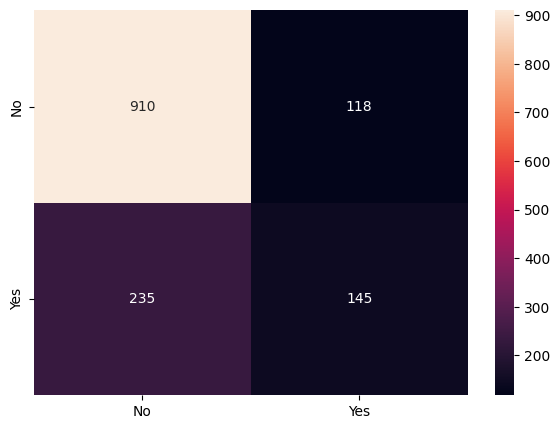

In [20]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc}, k = {knn.n_neighbors}')
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot=True, fmt='.0f')
acc = accuracy_score(y_test, y_pred)

In [21]:
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.3)

In [22]:
ranForest = RandomForestClassifier(max_depth=4, random_state=42)

In [23]:
ranForest.fit(X_train, y_train)
y_pred = ranForest.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.7330809275911027


array([[1549,    0],
       [ 564,    0]])

In [24]:
cross_val_score(RandomForestClassifier(max_depth=4, random_state=42), X_scaled, y, cv=5)

array([0.73456352, 0.73456352, 0.73456352, 0.73508523, 0.734375  ])

In [25]:
loReg = LogisticRegression(random_state=42)

In [26]:
loReg.fit(X_train, y_train)
y_pred = loReg.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.7491717936583058


array([[1237,  312],
       [ 218,  346]])

In [27]:
cross_val_score(LogisticRegression(random_state=42), X_scaled, y, cv=5)

array([0.77785664, 0.7920511 , 0.76011356, 0.77840909, 0.78053977])

In [28]:
kf = KFold(n_splits=5, shuffle=False)
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
        if fold_index == 1:
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [29]:
loReg.fit(X_train, y_train)
y_pred = loReg.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.7877927608232789


array([[904, 141],
       [158, 206]])

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.3)

In [31]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.7557974443918599


array([[1525,   21],
       [ 495,   72]])

In [32]:
cross_val_score(SVC(), X_scaled, y, cv=5)

array([0.74875798, 0.74449965, 0.75088715, 0.75426136, 0.75213068])

## GridSearchCV
***

**GridSearchCV will help us to organize the models and find the best one.
First we have to create a dict and put all the model that we'll compare**

In [35]:
models_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20,35,50,100],
            'kernel': ['rbf', 'linear', 'poly']
        }
    },
    'randon_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C':[1,5,10,20]
        }
    },
    'k_nearest_neighbor': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,7,10]
        }
    }    
}

**Then we make a for loop to iterate over all the models (as you can see GridSearchCV has the param cv so we can do cross validation too) i recommend do this in google colab platform. if you don't have a good pc this might take some time so google colab could help**

In [36]:
scores = []
for model_name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose=2, n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name, 
        'best_score': clf.best_score_,
        'best_params': clf.best_params_ 
    })

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


**And we create a Dataframe to look the best models**

In [38]:
df_bms = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_bms

,model,best_score,best_params
0,svm,0.770588,"{'C': 50, 'kernel': 'rbf'}"
1,randon_forest,0.785598,{'n_estimators': 20}
2,logistic_regression,0.649087,{'C': 1}
3,k_nearest_neighbor,0.702434,{'n_neighbors': 1}
